# EDA - Retail 

In [36]:
#importing all the necessary libraries

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#code to ignore the warnings

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [40]:
##Reading the SampleSuperstore dataset

store=pd.read_csv(r"C:\Users\Vikrant\Downloads\SampleSuperstore.csv")

In [42]:
#Display all the columns
pd.pandas.set_option('display.max_columns',None)

In [44]:
# Inspecting the dataset

store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [48]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [50]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [52]:
store.shape

(9994, 13)

In [54]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [56]:
# Inspecting count of null values in dataframe store in ascending order

store.isnull().sum().sort_values()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### No null values found in store dataframe.

## Data Cleaning

In [58]:
#inspecting categorical columns

set(store.columns) - set(store.describe().columns)

{'Category',
 'City',
 'Country',
 'Postal Code',
 'Region',
 'Segment',
 'Ship Mode',
 'State',
 'Sub-Category'}

### Postal code should be of string datatype.


In [60]:
#coverting the Postal code column to str datatype.

store['Postal Code'] = store['Postal Code'].astype(str)

In [62]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [64]:
store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


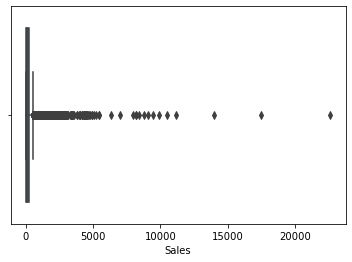

In [66]:
# identifying outliers

sns.boxplot(store['Sales'])
plt.show()

In [68]:
store[store['Sales'] > 5000]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
2505,Second Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Supplies,8187.650,5,0.0,327.5060
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
6340,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Machines,5199.960,4,0.0,1351.9896


In [70]:
store[store['Sales'] > 5000].shape

(19, 13)

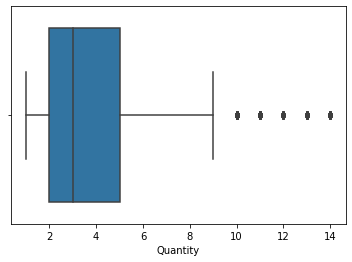

In [72]:
sns.boxplot(store['Quantity'])
plt.show()

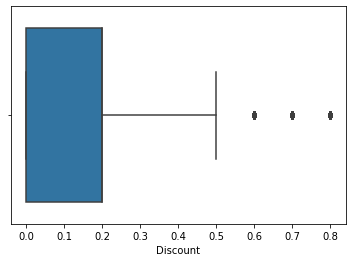

In [74]:
sns.boxplot(store['Discount'])
plt.show()

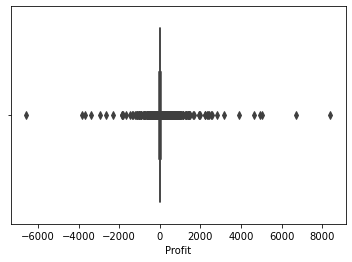

In [76]:
sns.boxplot(store['Profit'])
plt.show()

## EDA

### Univariate Analysis

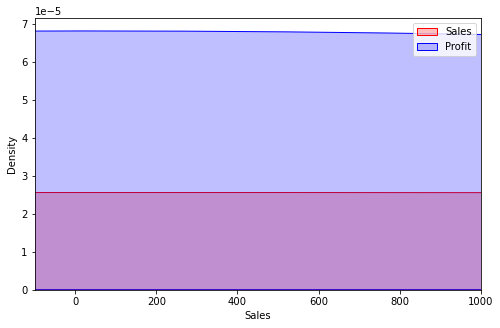

In [83]:
plt.figure(figsize=(8,5))
sns.kdeplot(store['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(store['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

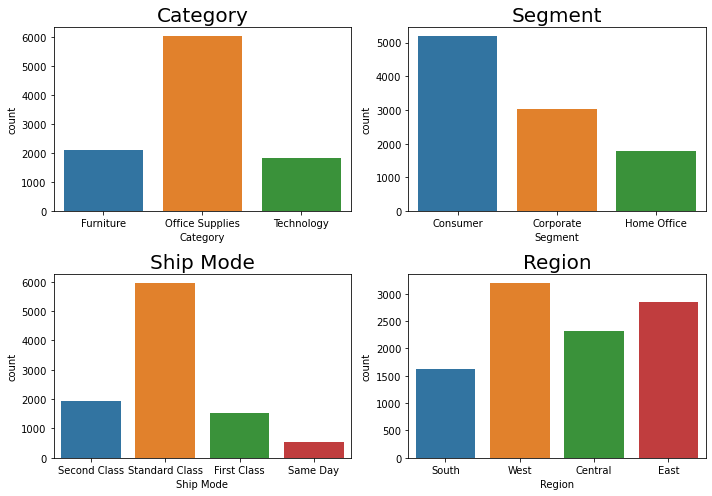

In [84]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(store['Category'],ax=axs[0][0])
sns.countplot(store['Segment'],ax=axs[0][1])
sns.countplot(store['Ship Mode'],ax=axs[1][0])
sns.countplot(store['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

- Most of the shipping mode was from the Standard class.
- Consumer segment has highest partcipation compared to other segments.
- Office supplies category was highest in demand.
- West is the highest partcipating region in the business followed by East. South region was least involved.

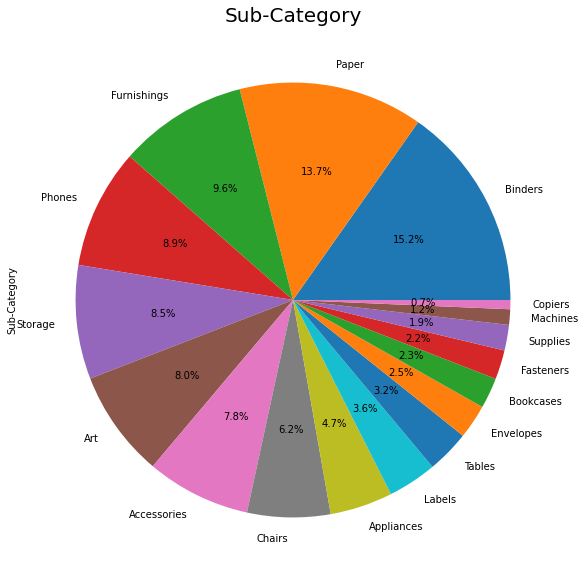

In [93]:
plt.figure(figsize=(12,10))
# sns.countplot(store['Sub-Category'])
store['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sub-Category',fontsize=20)
plt.show()


- Products under Binders, Paper, Furnishings, Phones, Storage, etc. subcategories were most bought.

Text(0.5, 1.0, 'State')

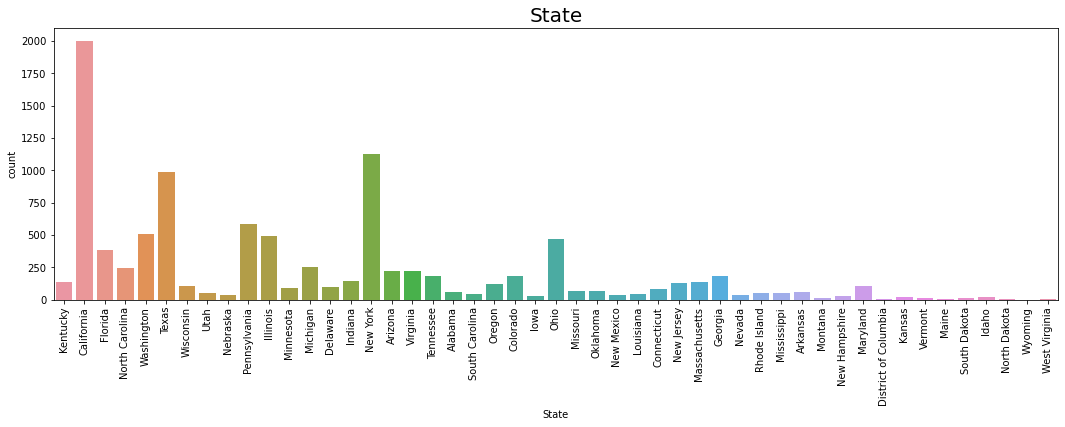

In [86]:
plt.figure(figsize=(18,5))
sns.countplot(store['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

- States like California, New York, Texas, Ohio, etc. were mostly active in business.
- On the oher hand, states like West vriginia, Wyoming, Maine, etc. were least involved.

Text(0.5, 1.0, 'Quantity')

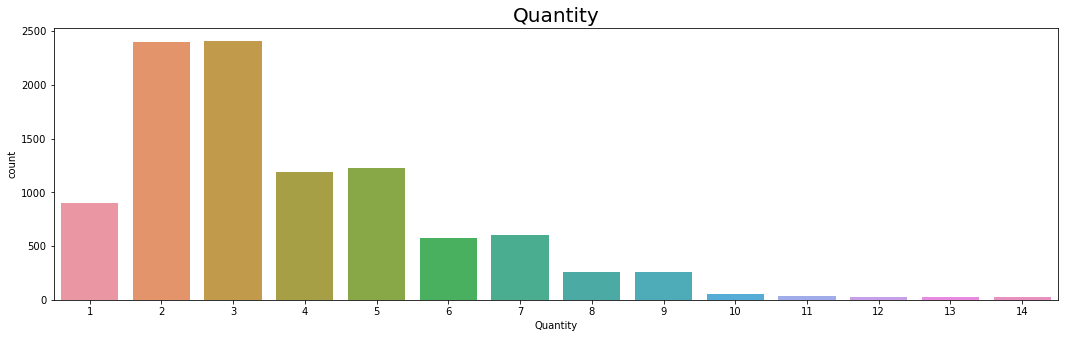

In [87]:
plt.figure(figsize=(18,5))
sns.countplot(store['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

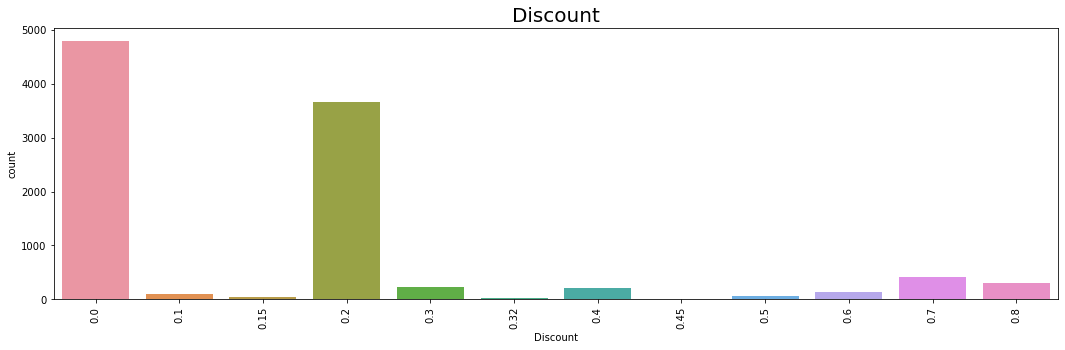

In [88]:
plt.figure(figsize=(18,5))
sns.countplot(store['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

In [90]:
grp_city = store.groupby(['City']).sum().sort_values(by='Profit', ascending=False)
grp_city = grp_city[grp_city['Profit'] > 6000]
grp_city

,Sales,Quantity,Discount,Profit
City,,,,
New York City,256368.161,3417,51.4,62036.9837
Los Angeles,175851.341,2879,55.5,30440.7579
Seattle,119540.742,1590,27.8,29156.0967
San Francisco,112669.092,1935,34.0,17507.3854
Detroit,42446.944,441,0.8,13181.7908
Lafayette,25036.200,104,0.0,10018.3876
Jackson,24963.858,318,2.5,7581.6828
Atlanta,17197.840,156,0.0,6993.6629
Minneapolis,16870.540,80,0.0,6824.5846


- New York city topped the business wih highest profit followed by Los Angeles and Seattle resp.

### Now let's visualize numerical variables

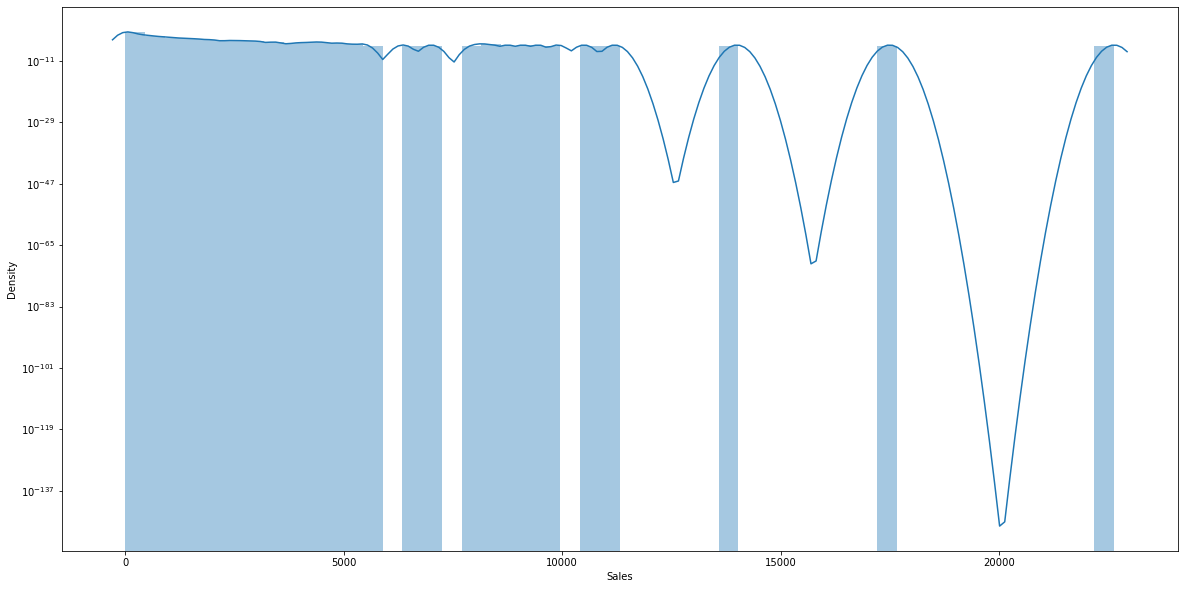

In [94]:
# Sales

plt.figure(figsize=(20,10))
ax=sns.distplot(store['Sales'])
ax.set_yscale('log')

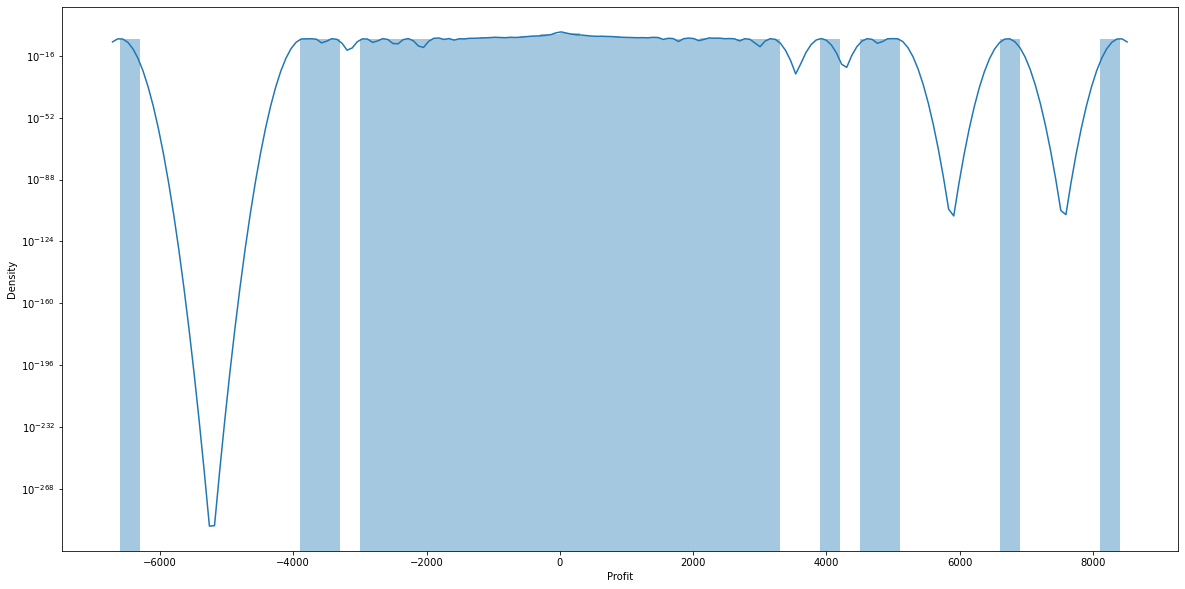

In [95]:
#Profit

plt.figure(figsize=(20,10))
ax=sns.distplot(store['Profit'])
ax.set_yscale('log')

## Bivariate Analysis

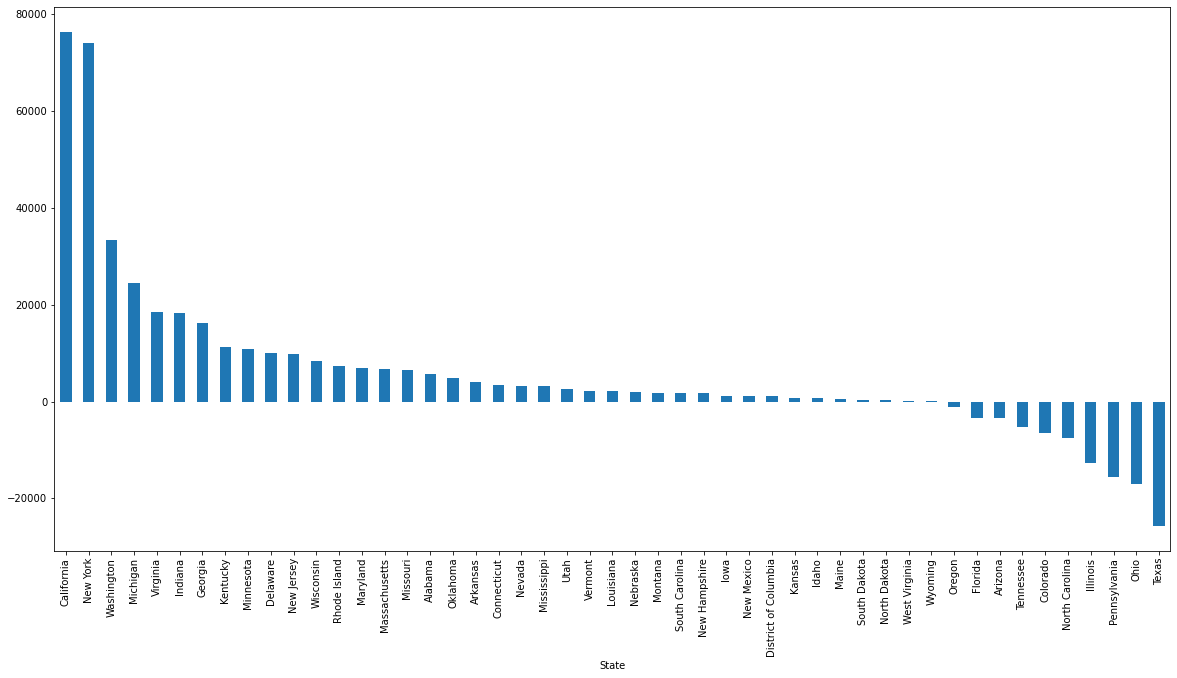

In [96]:
# checking on the state variable with th profit

plt.figure(figsize=(20,10))
grp2 = store.groupby(['State'])['Profit'].sum()
grp2.sort_values(ascending= False, inplace= True)
grp2.plot.bar()
plt.show()

- California state shows the highest profit.
- States like New-York and Washington shown good profit.
- States like Texax and Ohio has shown significant loss even when these states have highest participation in busiess.

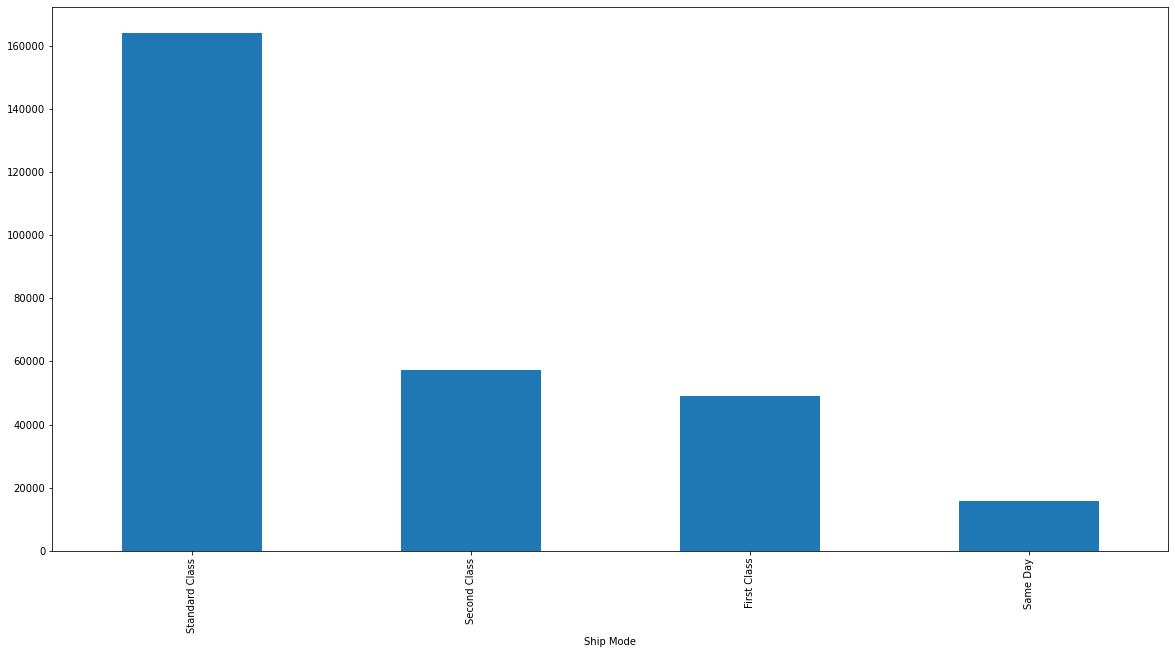

In [99]:
# checking on the Shipmode variable with th profit

plt.figure(figsize=(20,10))
grp3 = store.groupby(['Ship Mode'])['Profit'].sum()
grp3.sort_values(ascending= False, inplace= True)
grp3.plot.bar()
plt.show()

- Standard Class shipping mode making more profit among all other modes.

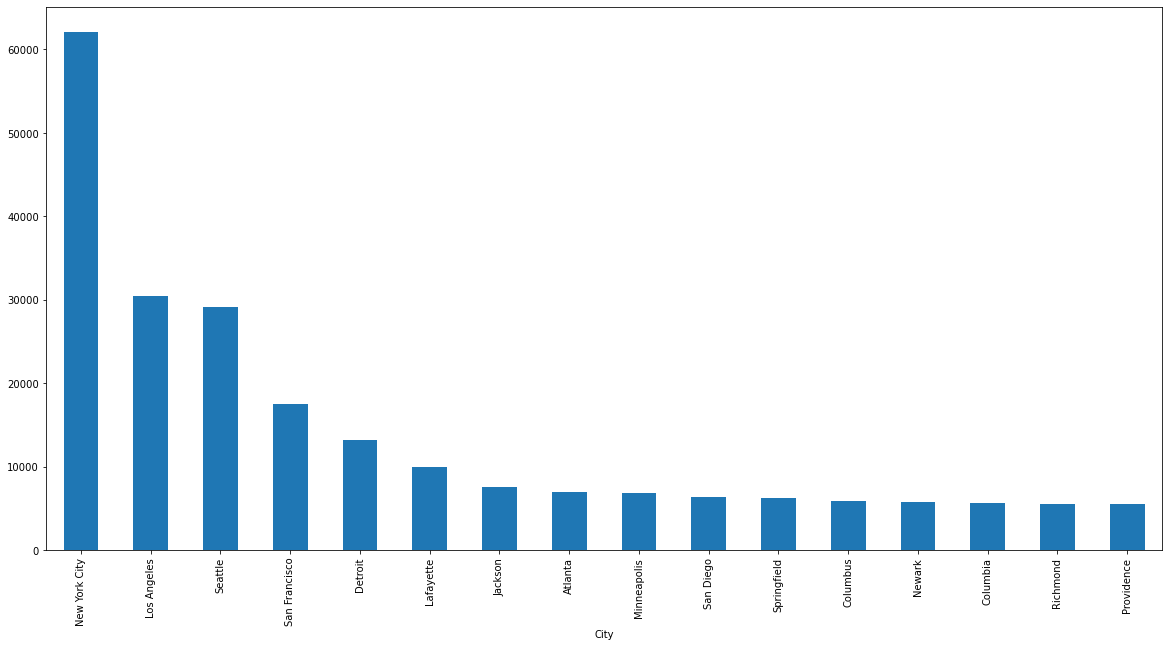

In [101]:
# checking on the City variable with th profit

plt.figure(figsize=(20,10))
grp4 = store.groupby(['City'])['Profit'].sum()
grp4 = grp4[grp4 > 5000]
grp4.sort_values(ascending= False, inplace= True)
grp4.plot.bar()
plt.show()

- We know cities like New York City, Los Angeles, Seattle, etc. are profit making cities. So we can now focus on citis like   Providence, Richmond, Columbia which are least profit making cities.

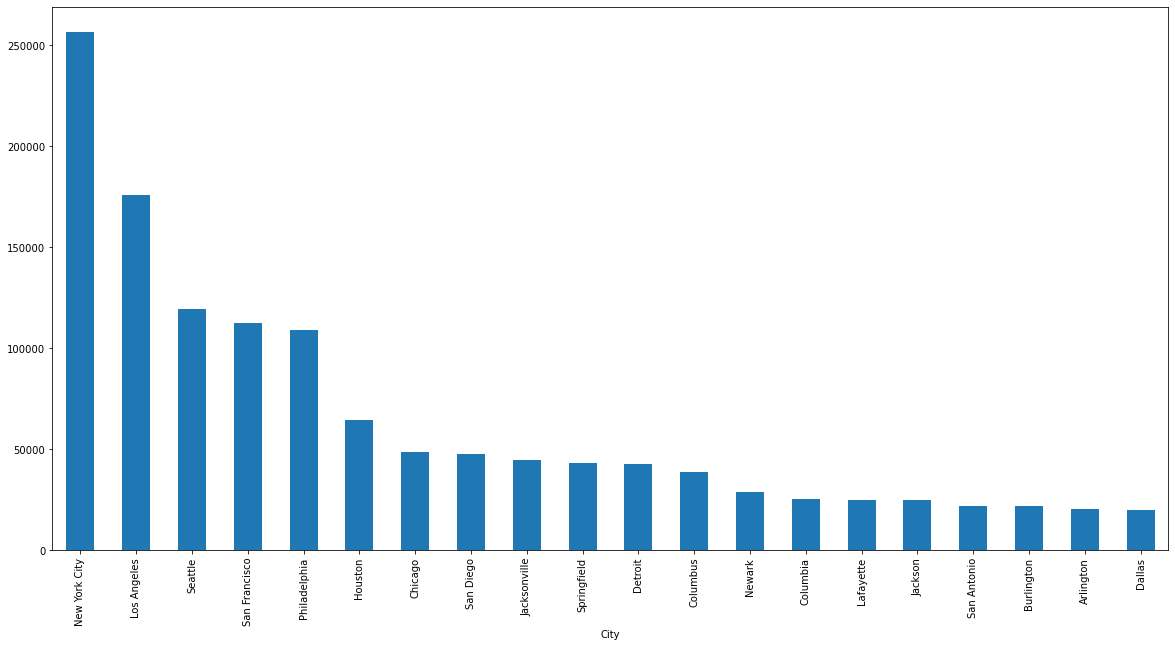

In [102]:
# checking on the City variable with th Sales

plt.figure(figsize=(20,10))
grp5 = store.groupby(['City'])['Sales'].sum()
grp5 = grp5[grp5 > 20000]
grp5.sort_values(ascending= False, inplace= True)
grp5.plot.bar()
plt.show()

- Since cities like New York City, Los Angeles, Seattle have highest Sales, profit is also high in these cities from previous barplot.
- So we can focus on cities like Dallas and Arlington where sales are less, to increase profit in those cities.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

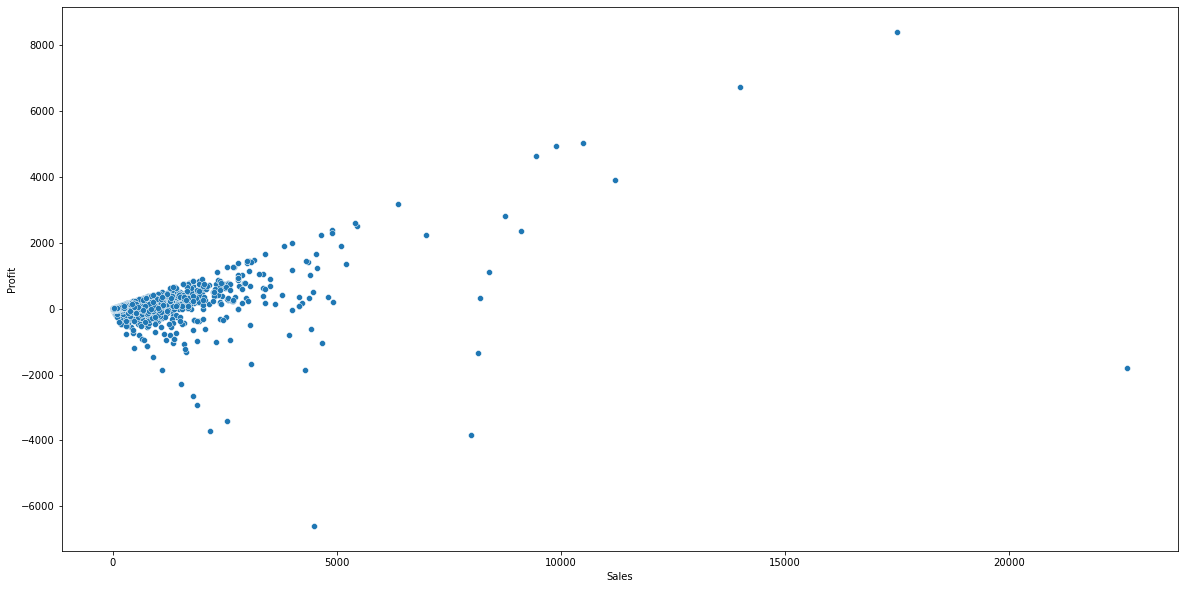

In [103]:
# the relation between the two variables - Profit and Sales
plt.figure(figsize=(20,10))
sns.scatterplot(store['Sales'], store['Profit'])

- Until certain point , these is good impact on Profit as sales increases, but after that increase in sales isn't helping out to make profit.

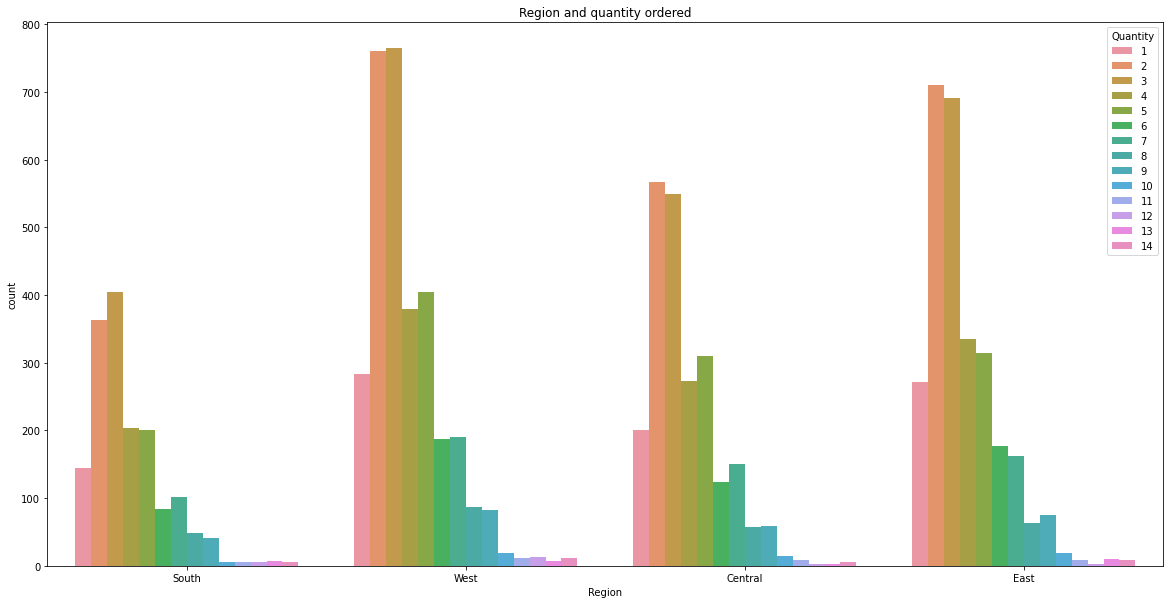

In [104]:
# visualizing region and the quantity ordered from that region

plt.figure(figsize=(20,10))
sns.countplot('Region', data=store, hue='Quantity')
plt.title('Region and quantity ordered')
plt.show()

- West region is the highest in ordering and also most active in the business, followed by East region.

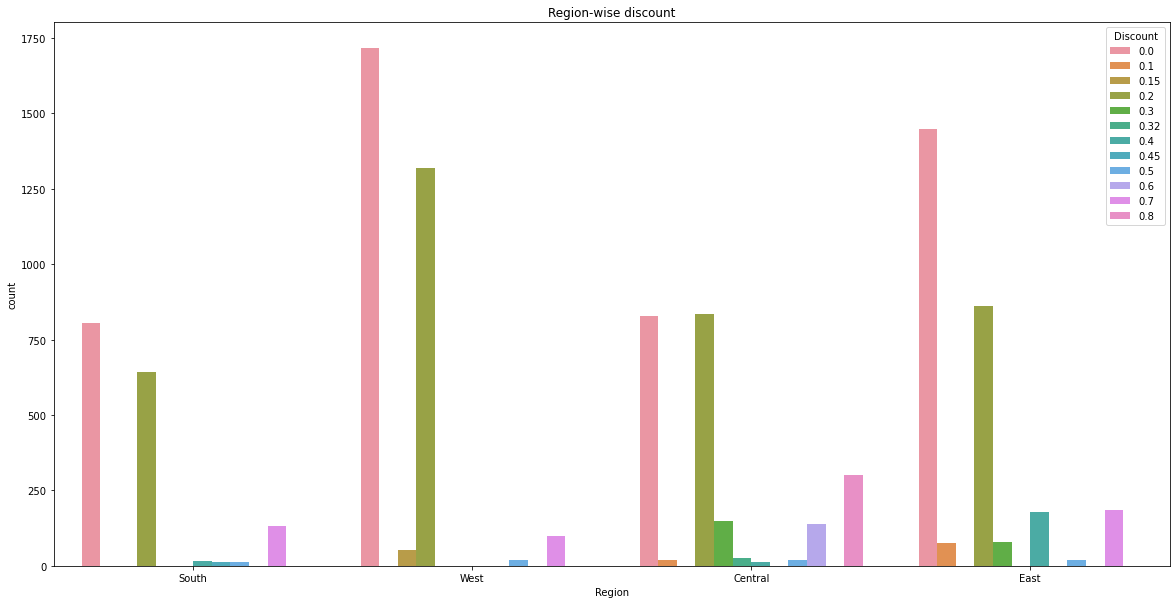

In [106]:
# visualizing the discount in the region

plt.figure(figsize=(20,10))
sns.countplot('Region', data=store, hue='Discount')
plt.title('Region-wise discount')
plt.show()

- West region, followed by East, gives more discoun compared to otehr regions.
- The more the discount in the region, the higher the sales and better the profit to that region.

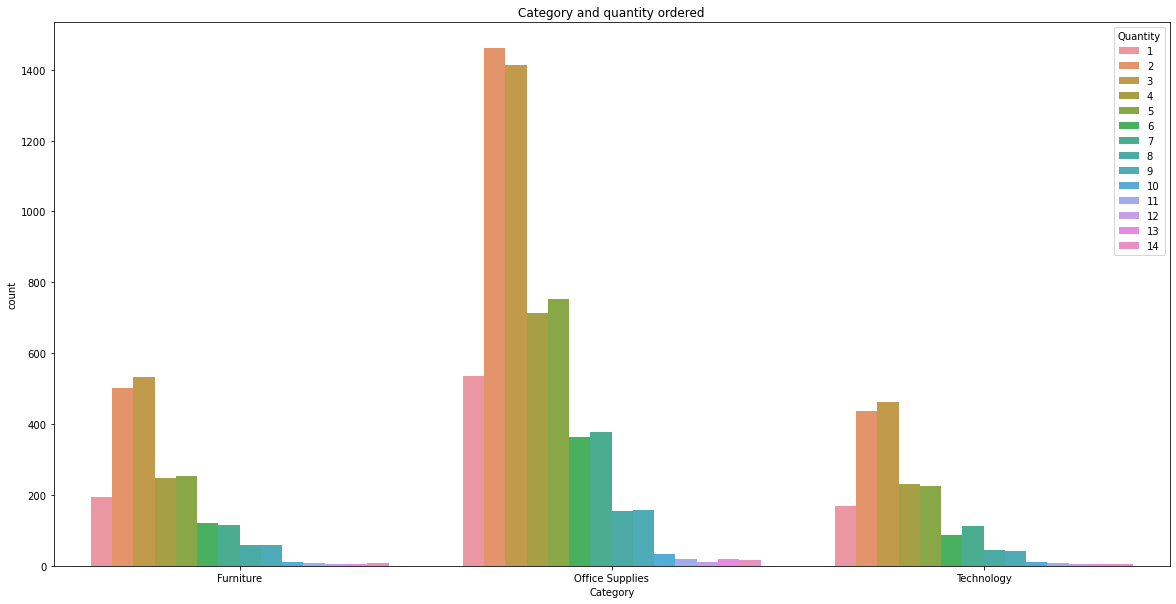

In [107]:
# visualizing category and the quantity ordered from that category

plt.figure(figsize=(20,10))
sns.countplot('Category', data=store, hue='Quantity')
plt.title('Category and quantity ordered')
plt.show()

- Office supplies category was most in demand with high quantity ordered

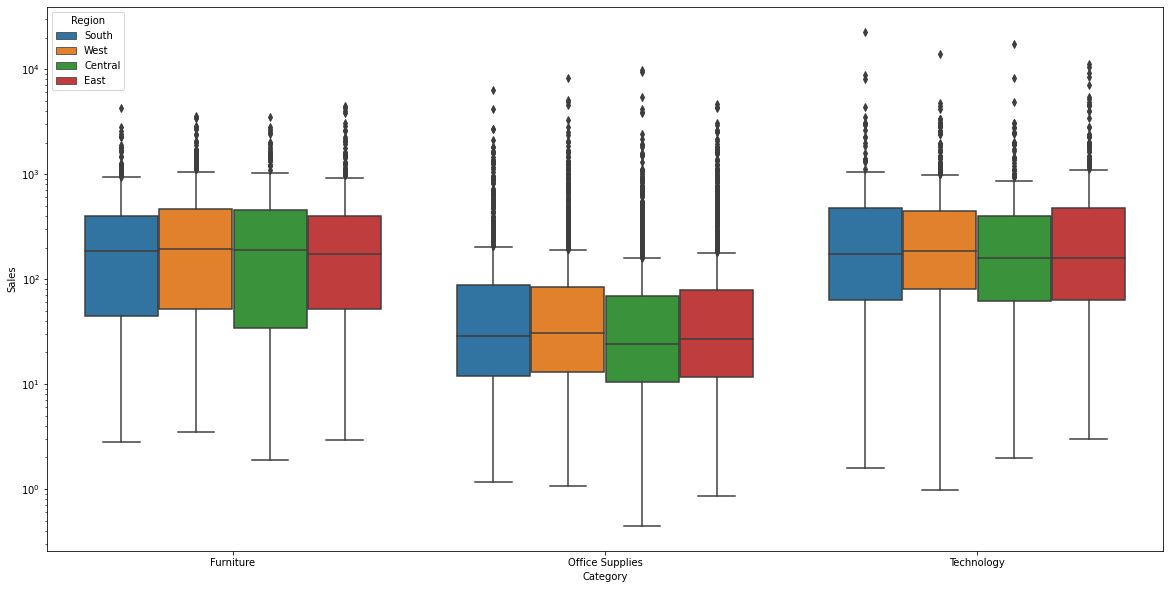

In [109]:
# visualizing the category variable with Sales and region

plt.figure(figsize=(20,10))
ax= sns.boxplot(x= 'Category', y='Sales', hue='Region', data=store)
ax.set_yscale('log')
plt.show()

- Furniture as well as technology categories has good business in the West region.
- Office supplies has lowest business in Central region.

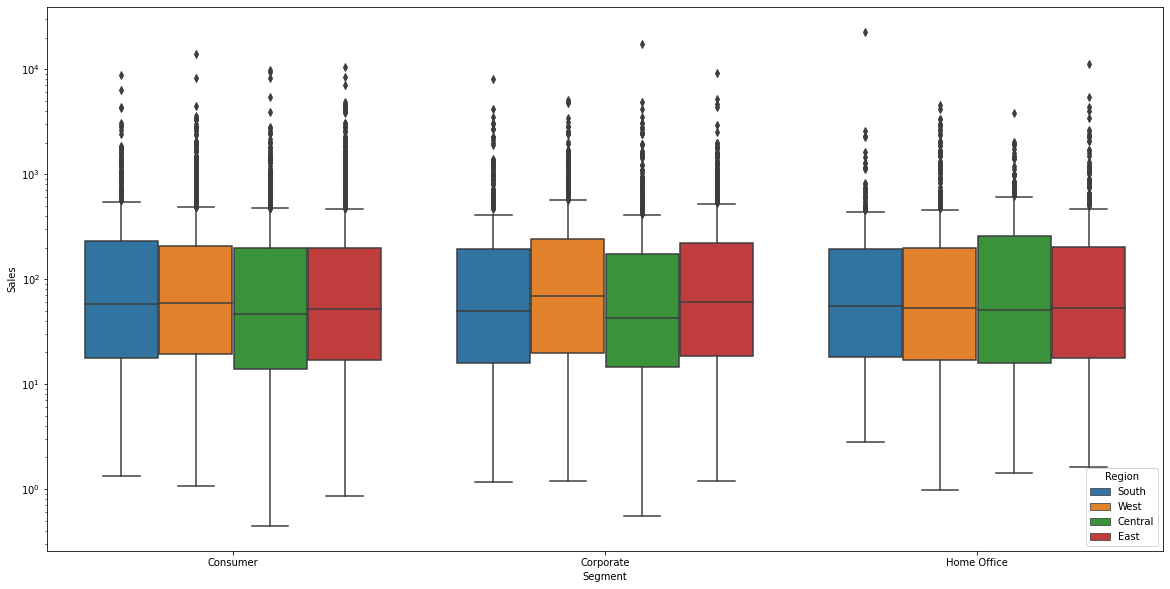

In [110]:
# visualizing the Segment variable with Sales and region

plt.figure(figsize=(20,10))
ax= sns.boxplot(x= 'Segment', y='Sales', hue='Region', data=store)
ax.set_yscale('log')
plt.show()

- Consumer segment makes good sales in all the regions.
- Carporate segment makes good business in West region.
- Home Office has higher number of sales in Central region.

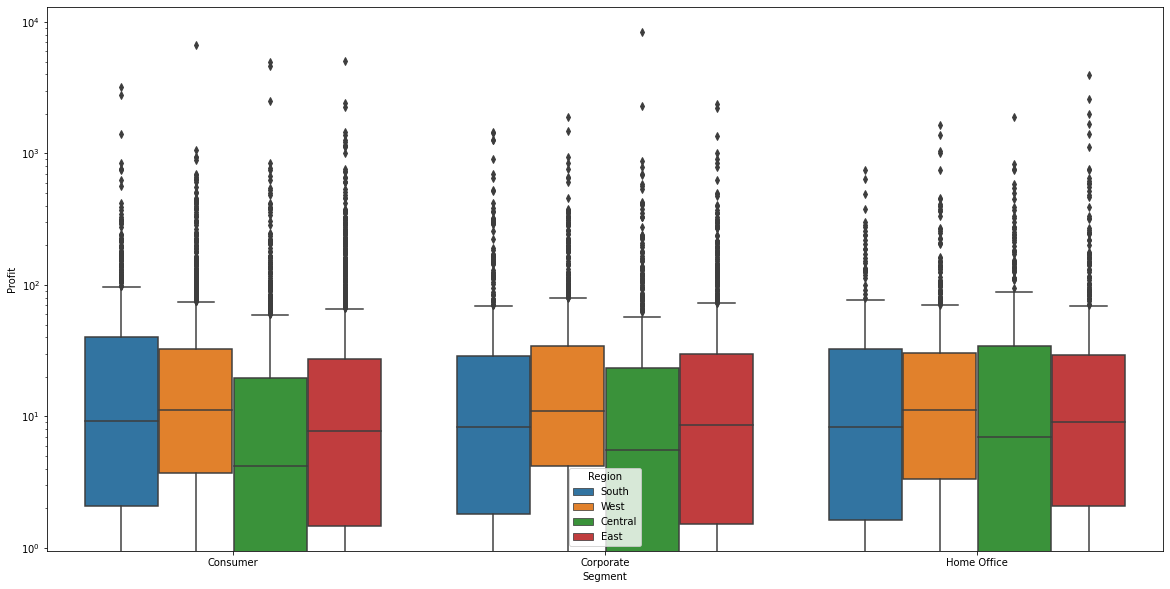

In [112]:
# visualizing the Segment variable with Profit and region

plt.figure(figsize=(20,10))
ax= sns.boxplot(x= 'Segment', y='Profit', hue='Region', data=store)
ax.set_yscale('log')
plt.show()

- Corporate segment is making profit in West region and is in loss in Central region.
- Consumer segment is making good profit in South region.
- One should focus on Central region since most of the segments facing losses in this region.

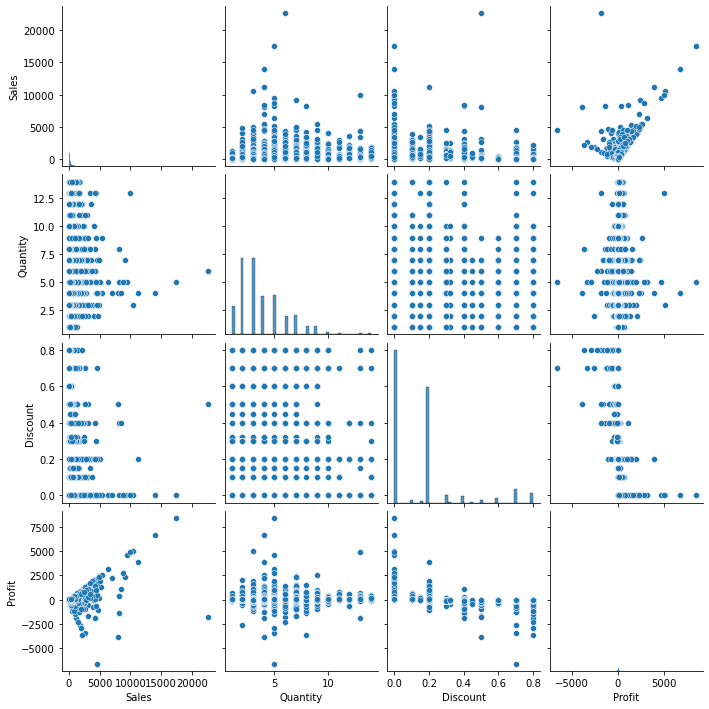

In [113]:
sns.pairplot(store)
plt.show()

In [114]:
# heatmap

store.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


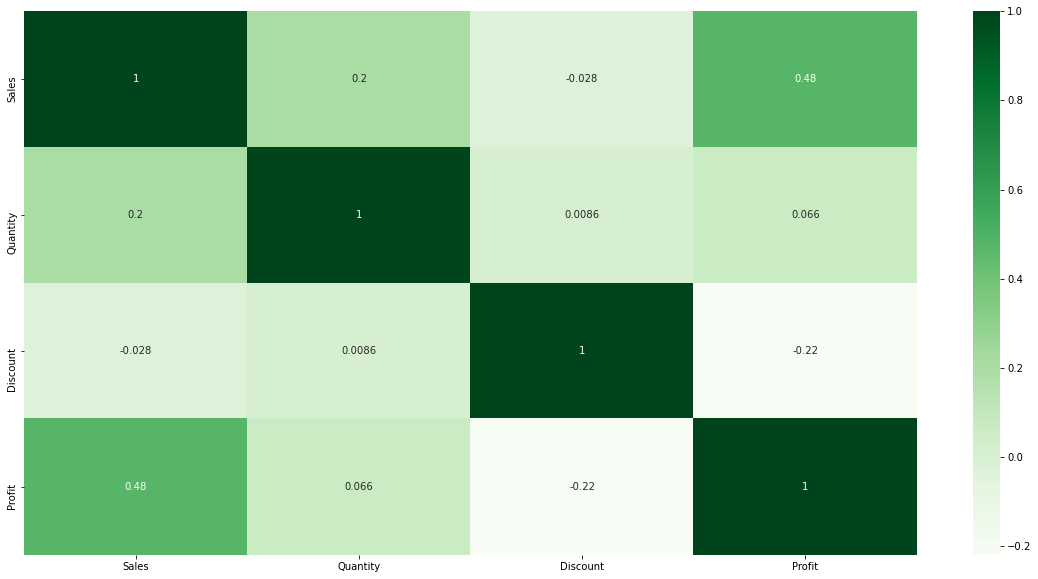

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(store.corr(), cmap='Greens',annot=True)
plt.show()

## Conclusion

- Sales and profit are moderately correlated. When there is sales, profit observed in the business
- Discount and profit are negatively correlated. So this feature SHOULD NOT be taken care.
- The focus should be more on __South region__ since more loss has been observed there.
- the discount is inversely proportional with Sales which should be taken care of.
- Few segments such as consumer and Home Office shows loss which need to be improved by looking at the other features like Sales and discont in that area.
- Cities like Dallas, Arlington, Providence, Richmond, Columbia, etc should given focus which are least profit making cities.